### Illustrate POLITY2 time series for selected countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from matplotlib.colors import LogNorm
from scipy.integrate import odeint
sns.set_context("talk", font_scale=1.4)


# for using LaTeX fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Data Loading

In [3]:
# load the Polity5 data from the excel data frame
timeSeries = pd.read_excel('./../data/polity5/p5v2018.xls')
# do some cleaning
timeSeries = timeSeries.dropna(subset=['year', 'country', 'polity2'])
timeSeries = timeSeries[timeSeries["polity2"] != -66]
timeSeries = timeSeries[timeSeries["polity2"] != -88]

### Illustration

In [6]:
def getCountryTimeSeries(timeSeriesIn,country):

    timeSeriesOut = timeSeriesIn[timeSeriesIn['country'] == country]

    return(timeSeriesOut)

In [13]:
allCountries = timeSeries['country'].unique()

In [71]:
# Time series for selected countries

timeSeriesUS = getCountryTimeSeries(timeSeries,'United States')
#timeSeriesIran = getCountryTimeSeries(timeSeries,'Iran')
timeSeriesChina = getCountryTimeSeries(timeSeries,'China')
timeSeriesSpain= getCountryTimeSeries(timeSeries,'Spain')
timeSeriesBolivia= getCountryTimeSeries(timeSeries,'Bolivia')
timeSeriesKazakhstan= getCountryTimeSeries(timeSeries,'Kazakhstan')


#timeSeriesGermany = getCountryTimeSeries(timeSeries,'Germany')

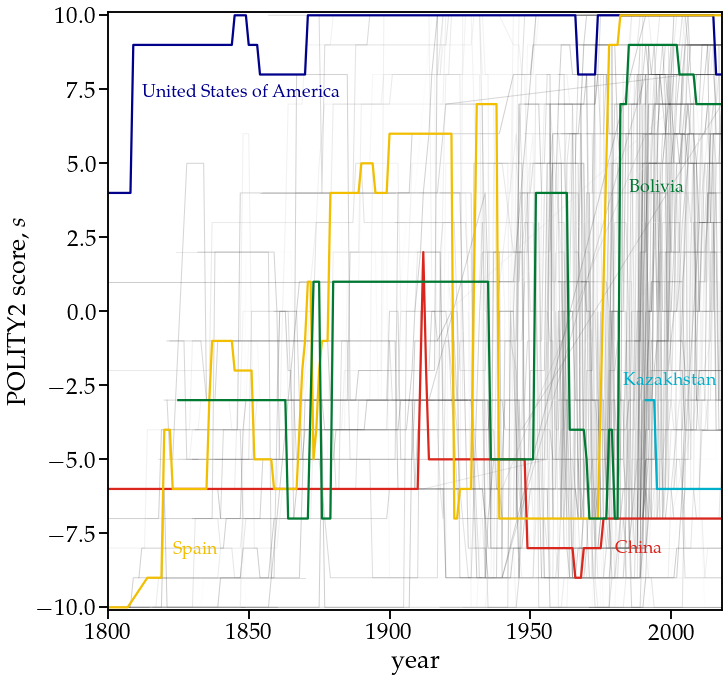

In [77]:

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(1, 1, 1)


for c in allCountries:
    #get time seris
    timeSeriesC = getCountryTimeSeries(timeSeries,c)
    # plot it
    randomGrey = random.random()*np.array([1.0, 1.0, 1.0])
    plt.plot(timeSeriesC['year'],timeSeriesC['polity2'],alpha=0.2,color=randomGrey,linewidth=1)

# select colours
colorUS = '#00008B'
colorChina = '#DB261D'
colorSpain = '#F1BF00'
colorBolivia = '#007A33'
colorKazakhstan = '#00AFCA'

# plotting
plt.plot(timeSeriesUS['year'],timeSeriesUS['polity2'],color=colorUS)
#plt.plot(timeSeriesIran['year'],timeSeriesIran['polity2'])
plt.plot(timeSeriesChina['year'],timeSeriesChina['polity2'],colorChina)
plt.plot(timeSeriesSpain['year'],timeSeriesSpain['polity2'],colorSpain)
plt.plot(timeSeriesBolivia['year'],timeSeriesBolivia['polity2'],colorBolivia)
plt.plot(timeSeriesKazakhstan['year'],timeSeriesKazakhstan['polity2'],colorKazakhstan)

# add labels
fsize=18
plt.text(1812,7.2,s='United States of America',color=colorUS, fontsize=fsize)
plt.text(1980,-8.2,s='China',color=colorChina, fontsize=fsize)
plt.text(1823,-8.2,s='Spain',color=colorSpain, fontsize=fsize)
plt.text(1985,4,s='Bolivia',color=colorBolivia, fontsize=fsize)
plt.text(1983,-2.5,s='Kazakhstan',color=colorKazakhstan, fontsize=fsize)



plt.ylim(-10.1,+10.1)
plt.xlim(1800,2018)
plt.xlabel(r'year')
plt.ylabel(r'POLITY2 score, $s$')
plt.savefig('./../results/figures/Fig1-timeSeriesPolity2.pdf',bbox_inches='tight')


In [78]:
lengthList = []

for c in allCountries:
    #get time seris
    timeSeriesC = getCountryTimeSeries(timeSeries,c)

    if timeSeriesC['polity2'].values[0]>timeSeriesC['polity2'].values[-1]:
        print(c)

    lengthList.append(len(timeSeriesC))

Azerbaijan
Belarus
Bangladesh
Cambodia
Cameroon
China
Congo-Brazzaville
Cuba
Czech Republic
Egypt
Equatorial Guinea
Eritrea
Ethiopia
Fiji
Gambia
Gran Colombia
Germany East
Israel
Jamaica
Kazakhstan
Laos
Nigeria
Oman
Pakistan
Korea North
Somalia
Sri Lanka
Sudan
Swaziland
Syria
Tajikistan
Uganda
Ukraine
Yemen South
Congo Kinshasa


In [85]:
np.mean(lengthList)

88.61538461538461

In [80]:
np.max(lengthList)

219

In [83]:
np.array(lengthList) == 219

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,